
## Open Machine Learning Course 

Authors: [Yury Kashnitskiy](https://yorko.github.io) and [Maxim Keremet](https://www.linkedin.com/in/maximkeremet/). Translated and edited by  [Artem Trunov](https://www.linkedin.com/in/datamove/), and [Aditya Soni](https://www.linkedin.com/in/aditya-soni-0505a9124/). This material is subject to the terms and conditions of the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license. Free use is permitted for any non-commercial purpose.

In [1]:
import numpy as np
import pandas as pd
# pip install seaborn 
import seaborn as sns
import matplotlib.pyplot as plt

Consider the following terms we use:
* unique flight - a record (row) in the dataset
* completed flight = flight that is not cancelled (Cancelled==0 in the dataset)
* flight code - a combination of ['UniqueCarrier','FlightNum'], i.e.  UA52
* airport code - a three letter airport alias from 'Origin or 'Dest' columns

**Reading data into memory and creating a Pandas ``DataFrame`` object**

(This may take a while, be patient)

We are not going to read in the whole dataset. In order to reduce memory footprint, we instead load only needed columns and cast them to suitable data types.

In [2]:
dtype = {'DayOfWeek': np.uint8, 'DayofMonth': np.uint8, 'Month': np.uint8 , 
         'Cancelled': np.uint8, 'Year': np.uint16, 'FlightNum': np.uint16 , 
         'Distance': np.uint16, 'UniqueCarrier': str, 'CancellationCode': str, 
         'Origin': str, 'Dest': str, 'ArrDelay': np.float16, 
         'DepDelay': np.float16, 'CarrierDelay': np.float16, 
         'WeatherDelay': np.float16, 'NASDelay': np.float16, 
         'SecurityDelay': np.float16, 'LateAircraftDelay': np.float16, 
         'DepTime': np.float16}

In [3]:
%%time
# change the path if needed
path = 'data/2008.csv'
flights_df = pd.read_csv(path, usecols=dtype.keys(), dtype=dtype)

Wall time: 56.9 s


**Check the number of rows and columns and print column names.**

In [4]:
print(flights_df.shape)
print(flights_df.columns)

(7009728, 19)
Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'UniqueCarrier',
       'FlightNum', 'ArrDelay', 'DepDelay', 'Origin', 'Dest', 'Distance',
       'Cancelled', 'CancellationCode', 'CarrierDelay', 'WeatherDelay',
       'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')


**Print first 5 rows of the dataset.**

In [5]:
flights_df.head()

Year  Month  DayofMonth  DayOfWeek  DepTime UniqueCarrier  FlightNum  \
0  2008      1           3          4   2003.0            WN        335   
1  2008      1           3          4    754.0            WN       3231   
2  2008      1           3          4    628.0            WN        448   
3  2008      1           3          4    926.0            WN       1746   
4  2008      1           3          4   1829.0            WN       3920   

   ArrDelay  DepDelay Origin Dest  Distance  Cancelled CancellationCode  \
0     -14.0       8.0    IAD  TPA       810          0              NaN   
1       2.0      19.0    IAD  TPA       810          0              NaN   
2      14.0       8.0    IND  BWI       515          0              NaN   
3      -6.0      -4.0    IND  BWI       515          0              NaN   
4      34.0      34.0    IND  BWI       515          0              NaN   

   CarrierDelay  WeatherDelay  NASDelay  SecurityDelay  LateAircraftDelay  
0           NaN           NaN       NaN            NaN                NaN  
1           NaN           NaN       NaN            NaN                NaN  
2           NaN           NaN       NaN            NaN                NaN  
3           NaN           NaN       NaN            NaN                NaN  
4           2.0           0.0       0.0            0.0               32.0

**Transpose the frame to see all features at once.**

In [6]:
flights_df.head().T

0     1     2     3     4
Year               2008  2008  2008  2008  2008
Month                 1     1     1     1     1
DayofMonth            3     3     3     3     3
DayOfWeek             4     4     4     4     4
DepTime            2003   754   628   926  1829
UniqueCarrier        WN    WN    WN    WN    WN
FlightNum           335  3231   448  1746  3920
ArrDelay            -14     2    14    -6    34
DepDelay              8    19     8    -4    34
Origin              IAD   IAD   IND   IND   IND
Dest                TPA   TPA   BWI   BWI   BWI
Distance            810   810   515   515   515
Cancelled             0     0     0     0     0
CancellationCode    NaN   NaN   NaN   NaN   NaN
CarrierDelay        NaN   NaN   NaN   NaN     2
WeatherDelay        NaN   NaN   NaN   NaN     0
NASDelay            NaN   NaN   NaN   NaN     0
SecurityDelay       NaN   NaN   NaN   NaN     0
LateAircraftDelay   NaN   NaN   NaN   NaN    32

** Let's add new column - unique FlightId: **

In [7]:
flights_df['FlightId'] = flights_df['UniqueCarrier'] + flights_df['FlightNum'].astype(str)
flights_df['FlightId'].head()

0     WN335
1    WN3231
2     WN448
3    WN1746
4    WN3920
Name: FlightId, dtype: object

**Examine data types of all features and total dataframe size in memory.**

In [8]:
flights_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7009728 entries, 0 to 7009727
Data columns (total 20 columns):
Year                 uint16
Month                uint8
DayofMonth           uint8
DayOfWeek            uint8
DepTime              float16
UniqueCarrier        object
FlightNum            uint16
ArrDelay             float16
DepDelay             float16
Origin               object
Dest                 object
Distance             uint16
Cancelled            uint8
CancellationCode     object
CarrierDelay         float16
WeatherDelay         float16
NASDelay             float16
SecurityDelay        float16
LateAircraftDelay    float16
FlightId             object
dtypes: float16(8), object(5), uint16(3), uint8(4)
memory usage: 441.2+ MB


**Get basic statistics of each feature.**

In [9]:
flights_df.describe().T

count         mean          std     min     25%  \
Year               7009728.0  2008.000000     0.000000  2008.0  2008.0   
Month              7009728.0     6.375130     3.406737     1.0     3.0   
DayofMonth         7009728.0    15.728015     8.797068     1.0     8.0   
DayOfWeek          7009728.0     3.924182     1.988259     1.0     2.0   
DepTime            6873482.0          NaN          NaN     1.0   928.0   
FlightNum          7009728.0  2224.200105  1961.715999     1.0   622.0   
ArrDelay           6855029.0          NaN          NaN  -519.0   -10.0   
DepDelay           6873482.0          NaN          NaN  -534.0    -4.0   
Distance           7009728.0   726.387029   562.101803    11.0   325.0   
Cancelled          7009728.0     0.019606     0.138643     0.0     0.0   
CarrierDelay       1524735.0          NaN          NaN     0.0     0.0   
WeatherDelay       1524735.0          NaN          NaN     0.0     0.0   
NASDelay           1524735.0          NaN          NaN     0.0     0.0   
SecurityDelay      1524735.0          NaN          NaN     0.0     0.0   
LateAircraftDelay  1524735.0          NaN          NaN     0.0     0.0   

                      50%     75%     max  
Year               2008.0  2008.0  2008.0  
Month                 6.0     9.0    12.0  
DayofMonth           16.0    23.0    31.0  
DayOfWeek             4.0     6.0     7.0  
DepTime            1325.0  1728.0  2400.0  
FlightNum          1571.0  3518.0  9743.0  
ArrDelay             -2.0    12.0  2460.0  
DepDelay             -1.0     8.0  2468.0  
Distance            581.0   954.0  4962.0  
Cancelled             0.0     0.0     1.0  
CarrierDelay          0.0    16.0  2436.0  
WeatherDelay          0.0     0.0  1352.0  
NASDelay              6.0    21.0  1357.0  
SecurityDelay         0.0     0.0   392.0  
LateAircraftDelay     0.0    26.0  1316.0

**Count unique Carriers and plot their relative share of flights:**

In [10]:
flights_df['UniqueCarrier'].nunique()

20

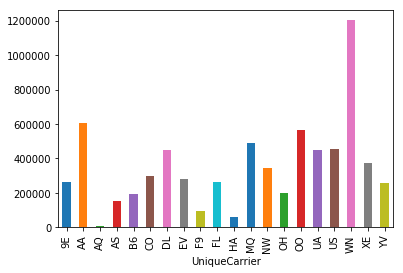

In [11]:
flights_df.groupby('UniqueCarrier').size().plot(kind='bar');

**We can also _group by_ category/categories in order to calculate different aggregated statistics.**

**For example, finding top-3 flight codes, that have the largest total distance travelled in year 2008.**

In [12]:
flights_df.groupby(['UniqueCarrier','FlightNum'])['Distance'].sum().sort_values(
    ascending=False).iloc[:3]

UniqueCarrier  FlightNum
CO             15           1796244.0
               14           1796244.0
UA             52           1789722.0
Name: Distance, dtype: float64

**Another way:**

In [13]:
flights_df.groupby(['UniqueCarrier','FlightNum'])\
  .agg({'Distance': [np.mean, np.sum, 'count'],
        'Cancelled': np.sum})\
  .sort_values(('Distance', 'sum'), ascending=False)\
  .iloc[0:3]

Distance                  Cancelled
                                mean        sum count       sum
UniqueCarrier FlightNum                                        
CO            15         4962.000000  1796244.0   362         0
              14         4962.000000  1796244.0   362         0
UA            52         2465.181818  1789722.0   726         8

**Number of flights by days of week and months:**

In [14]:
pd.crosstab(flights_df.Month, flights_df.DayOfWeek)

DayOfWeek       1       2       3       4       5      6      7
Month                                                          
1           80807   97298  100080  102043   81940  67178  76419
2           81504   79700   80587   82158  102726  66462  76099
3          103210   81159   82307   82831   82936  86153  97494
4           82463  100785  102586   82799   82964  68304  78225
5           80626   79884   81264  102572  102878  84493  74576
6          104168   82160   82902   83617   83930  72322  99566
7           84095  103429  103315  105035   79349  72219  80489
8           82983   80895   81773   82625  103878  86155  93970
9           94300   91533   74057   75589   75881  58343  71205
10          75131   72195   91900   94123   93894  58168  70794
11          74214   72443   73653   68071   70484  76031  88376
12          92700   90568   85241   70761   74306  61708  69674

**It can also be handy to color such tables in order to easily notice outliers:**

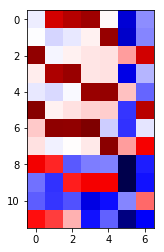

In [15]:
plt.imshow(pd.crosstab(flights_df.Month, flights_df.DayOfWeek),
           cmap='seismic', interpolation='none');

**Flight distance histogram:**

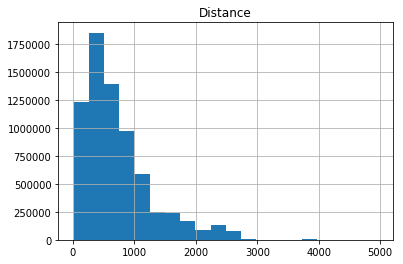

In [16]:
flights_df.hist('Distance', bins=20);

**Making a histogram of flight frequency by date.**

In [17]:
flights_df['Date'] = pd.to_datetime(flights_df.rename(
    columns={'DayofMonth': 'Day'})[['Year', 'Month', 'Day']])

In [18]:
flights_df['Date'].head()

0   2008-01-03
1   2008-01-03
2   2008-01-03
3   2008-01-03
4   2008-01-03
Name: Date, dtype: datetime64[ns]

In [19]:
num_flights_by_date = flights_df.groupby('Date').size()

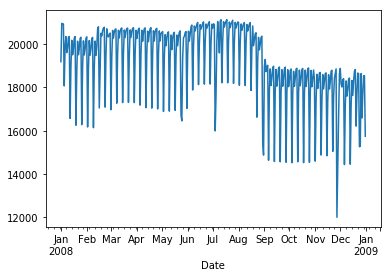

In [20]:
num_flights_by_date.plot();

**Do you see a weekly pattern above? And below?**

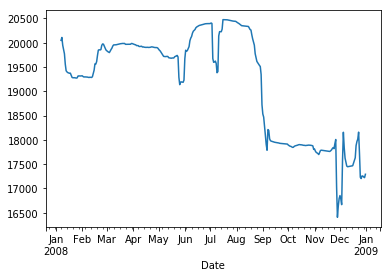

In [21]:
num_flights_by_date.rolling(window=7).mean().plot();

**We'll need a new column in our dataset - departure hour, let's create it.**

As we see, `DepTime` is distributed from 1 to 2400 (it is given in the `hhmm` format, check the [column description](https://www.transtats.bts.gov/Fields.asp?Table_ID=236) again). We'll treat departure hour as `DepTime` // 100 (divide by 100 and apply the `floor` function). However, now we'll have both hour 0 and hour 24. Hour 24 sounds strange, we'll set it to be 0 instead (a typical imperfectness of real data, however, you can check that it affects only 521 rows, which is sort of not a big deal). So now values of a new column `DepHour` will be distributed from 0 to 23. There are some missing values, for now we won't fill in them, just ignore them. 

In [22]:
flights_df['DepHour'] = flights_df['DepTime'] // 100
flights_df['DepHour'].replace(to_replace=24, value=0, inplace=True)

In [23]:
flights_df['DepHour'].describe()

count    6873482.0
mean           NaN
std            0.0
min            0.0
25%            9.0
50%           13.0
75%           17.0
max           23.0
Name: DepHour, dtype: float64

### Now it's your turn. Answer the questions below.

In [24]:
flights_df.head()

Year  Month  DayofMonth  DayOfWeek  DepTime UniqueCarrier  FlightNum  \
0  2008      1           3          4   2003.0            WN        335   
1  2008      1           3          4    754.0            WN       3231   
2  2008      1           3          4    628.0            WN        448   
3  2008      1           3          4    926.0            WN       1746   
4  2008      1           3          4   1829.0            WN       3920   

   ArrDelay  DepDelay Origin   ...   Cancelled  CancellationCode  \
0     -14.0       8.0    IAD   ...           0               NaN   
1       2.0      19.0    IAD   ...           0               NaN   
2      14.0       8.0    IND   ...           0               NaN   
3      -6.0      -4.0    IND   ...           0               NaN   
4      34.0      34.0    IND   ...           0               NaN   

   CarrierDelay WeatherDelay  NASDelay  SecurityDelay  LateAircraftDelay  \
0           NaN          NaN       NaN            NaN                NaN   
1           NaN          NaN       NaN            NaN                NaN   
2           NaN          NaN       NaN            NaN                NaN   
3           NaN          NaN       NaN            NaN                NaN   
4           2.0          0.0       0.0            0.0               32.0   

   FlightId       Date DepHour  
0     WN335 2008-01-03    20.0  
1    WN3231 2008-01-03     7.0  
2     WN448 2008-01-03     6.0  
3    WN1746 2008-01-03     9.0  
4    WN3920 2008-01-03    18.0  

[5 rows x 22 columns]

**1. How many unique carriers are there in our dataset?**

- 10
- 15
- 20
- 25 

In [25]:
flights_df['UniqueCarrier'].nunique()

20

**2. We have  both cancelled and completed flights in the datset. Check if there are more completed or cancelled flights. What is the difference?** <br>

*Hint:* Take a look at *Cancelled* to see the categories and *FlightNum* column to calculate unique flights for each category.

- Cancelled overweights completed by 329 flights
- Completed overweights cancelled by 6734860 flights
- Cancelled overweights completed by 671 flights
- Completed overweights cancelled by 11088967 flights

In [26]:
flights_df.groupby('Cancelled')['FlightNum'].nunique()

Cancelled
0    7534
1    7205
Name: FlightNum, dtype: int64

**3. Find a flight with the longest departure delays and a flight with the longest arrival delay. Do they have the same destination airport, and if yes, what is its code?**

- yes, ATL
- yes, HNL
- yes, MSP
- no

In [29]:
num_departure = flights_df['DepDelay'].idxmax()
num_arrival = flights_df['ArrDelay'].idxmax()
print(flights_df.iloc[num_departure]['Dest'])
print(flights_df.iloc[num_arrival]['Dest'])

MSP
MSP


**4. Find the carrier that has the greatest number of cancelled flights.**

- AA
- MQ
- WN
- CO 

In [30]:
flights_df[flights_df['Cancelled'] == 1].groupby('UniqueCarrier').size().idxmax()

'MQ'

**5. Let's examine departure time and consider distribution by hour (column `DepHour` that we've created earlier). Which hour has the highest percentage of flights?**<br>

- 1 am 
- 5 am  
- 8 am
- 3 pm 

In [31]:
flights_df.groupby('DepHour').size().idxmax()

8.0

**6. OK, now let's examine cancelled flight distribution by time. Which hour has the least percentage of cancelled flights?**<br>

- 2 am
- 9 pm  
- 8 am  
- 3 am 

In [32]:
pd.crosstab(flights_df['DepHour'], flights_df['Cancelled'], normalize=True)[1]

DepHour
0.0     1.018407e-06
1.0     5.819467e-07
2.0     1.454867e-07
3.0     0.000000e+00
4.0     1.454867e-07
5.0     3.491680e-06
6.0     1.163893e-05
7.0     1.207539e-05
8.0     1.149345e-05
9.0     8.147253e-06
10.0    8.292740e-06
11.0    8.583713e-06
12.0    7.710793e-06
13.0    6.837873e-06
14.0    8.292740e-06
15.0    1.062053e-05
16.0    1.062053e-05
17.0    1.062053e-05
18.0    9.602120e-06
19.0    1.178442e-05
20.0    7.419820e-06
21.0    1.192991e-05
22.0    8.292740e-06
23.0    3.491680e-06
Name: 1, dtype: float64

**7. Is there any hour that didn't have any cancelled flights at all? Check all that apply.**

- 3
- 19
- 22
- 4 

In [33]:
pd.crosstab(flights_df['DepHour'], flights_df['Cancelled'])[1].idxmin()

3.0

**8. Find the busiest hour, or in other words, the hour when the number of departed flights reaches its maximum.**<br>

*Hint:* Consider only *completed* flights.

- 4
- 7
- 8
- 17 

In [34]:
flights_df[flights_df['Cancelled'] == 0].groupby('DepHour').size().idxmax()

8.0

**9. Since we know the departure hour, it might be interesting to examine the average delay for corresponding hour. Are there any cases, when the planes on average departed earlier than they should have done? And if yes, at what departure hours did it happen?**<br>

*Hint:* Consider only *completed* flights.

- no, there are no such cases
- yes, at 5-6 am
- yes, at 9-10 am
- yes, at 2-4 pm

In [35]:
avg_delay = flights_df[flights_df['Cancelled'] == 0].groupby('DepHour')['DepDelay'].mean()
avg_delay[avg_delay < 0]

DepHour
5.0   -4.253906
6.0   -1.629883
Name: DepDelay, dtype: float16

**10. Considering only the completed flights by the carrier, that you have found in Question 4, find the distribution of these flights by hour. At what time does the greatest number of its planes depart?**<br>

- at noon
- at 7 am 
- at 8 am
- at 10 am

In [36]:
carrier = flights_df[flights_df['Cancelled'] == 1].groupby('UniqueCarrier')['FlightNum'].count().idxmax()
flights_df[(flights_df['Cancelled'] == 0) & (flights_df['UniqueCarrier'] == carrier)].\
                            groupby('DepHour').size().idxmax()

10.0

**11. Find top-10 carriers in terms of the number of *completed* flights (_UniqueCarrier_ column)?**

**Which of the listed below is _not_ in your top-10 list?**
- DL
- AA
- OO
- EV

In [37]:
carriers = flights_df[flights_df['Cancelled'] == 0].groupby('UniqueCarrier')['FlightNum'].count()
carriers.sort_values(ascending=False).iloc[:10]

UniqueCarrier
WN    1189365
AA     587445
OO     554723
MQ     472362
US     447007
DL     445118
UA     438974
XE     364518
NW     344746
CO     294753
Name: FlightNum, dtype: int64

**12. Plot distributions of flight cancellation reasons (_CancellationCode_).**

**What is the most frequent reason for flight cancellation? (Use this [link](https://www.transtats.bts.gov/Fields.asp?Table_ID=236) to translate codes into reasons)**
- Carrier
- Weather conditions
- National Air System
- Security reasons

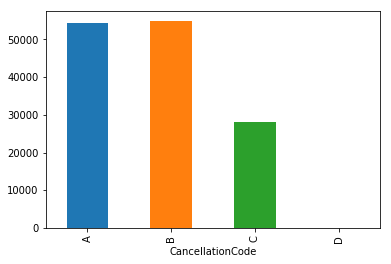

In [39]:
flights_df.groupby('CancellationCode').size().plot(kind='bar')

**13. Which route is the most frequent, in terms of the number of flights?**

(Take a look at _'Origin'_ and _'Dest'_ features. Consider _A->B_ and _B->A_ directions as _different_ routes) 

 - New-York – Washington (JFK-IAD)
 - San-Francisco – Los-Angeles (SFO-LAX)
 - San-Jose – Dallas (SJC-DFW)
 - New-York – San-Francisco (JFK-SFO)

In [40]:
flights_df['Route'] = flights_df['Origin'] + '-' + flights_df['Dest']
flights_df.groupby('Route').size().idxmax()

'SFO-LAX'

**14. Find top-5 delayed routes (count how many times they were delayed on departure). From all flights on these 5 routes, count all flights with weather conditions contributing to a delay.**

_Hint_: consider only positive delays

- 449 
- 539 
- 549 
- 668

In [41]:
most_delayed = flights_df[flights_df['DepDelay'] > 0].groupby('Route').size().sort_values(ascending=False).iloc[:5].index
flights_df[(flights_df['Route'].isin(most_delayed)) & (flights_df['WeatherDelay'] > 0)]['FlightNum'].count()

668

In [42]:
most_delayed

Index(['LAX-SFO', 'DAL-HOU', 'SFO-LAX', 'ORD-LGA', 'HOU-DAL'], dtype='object', name='Route')

**15. Examine the hourly distribution of departure times. Choose all correct statements:**

 - Flights are normally distributed within time interval [0-23] (Search for: Normal distribution, bell curve).
 - Flights are uniformly distributed within time interval [0-23].
 - In the period from 0 am to 4 am there are considerably less flights than from 7 pm to 8 pm.

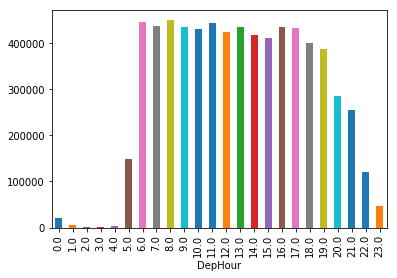

In [43]:
flights_df.groupby('DepHour').size().plot(kind='bar')

**16. Show how the number of flights changes through time (on the daily/weekly/monthly basis) and interpret the findings.**

**Choose all correct statements:**
- The number of flights during weekends is less than during weekdays (working days). 
- The lowest number of flights is on Sunday.
- There are less flights during winter than during summer.

_Hint_: Look for official meteorological winter months for the Nothern Hemisphsere.

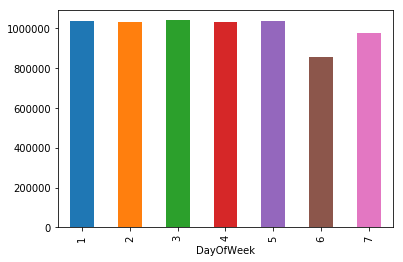

In [44]:
flights_df.groupby('DayOfWeek').size().plot(kind='bar')

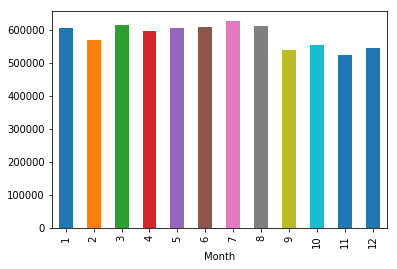

In [45]:
flights_df.groupby('Month').size().plot(kind='bar')

**17. Examine the distribution of cancellation reasons with time. Make a bar plot of cancellation reasons aggregated by months.**

**Choose all correct statements:**
- October has the lowest number of cancellations due to weather. 
- The highest number of cancellations in September is due to Security reasons.
- April's top cancellation reason is carriers.
- Flights cancellations due to National Air System are more frequent than those due to carriers.

In [46]:
tab = pd.crosstab(flights_df['Month'], flights_df['CancellationCode'])
tab['A'].sum()

54330

In [47]:
tab['C'].sum()

28188

In [48]:
tab

CancellationCode     A      B     C  D
Month                                 
1                 6635   6711  3962  0
2                 6090  10034  4470  2
3                 6038   7520  2621  4
4                 7312   1479  1564  0
5                 3157   1461  1608  3
6                 4251   3448  3232  0
7                 5292   2612  2694  0
8                 3852   3582  2401  0
9                 2246   6478  1188  1
10                2097    600   552  0
11                2510    937  1009  2
12                4850  10042  2887  0

**18. Which month has the greatest number of cancellations due to Carrier?** 
- May
- January
- September
- April

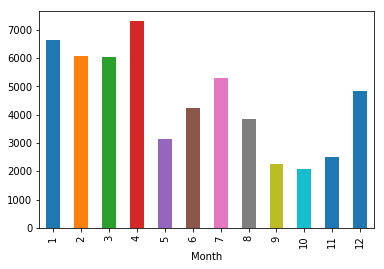

In [49]:
flights_df[flights_df['CancellationCode'] == 'A'].groupby('Month').size().plot(kind='bar')

**19. Identify the carrier with the greatest number of cancellations due to carrier in the corresponding month from the previous question.**

- 9E
- EV
- HA
- AA

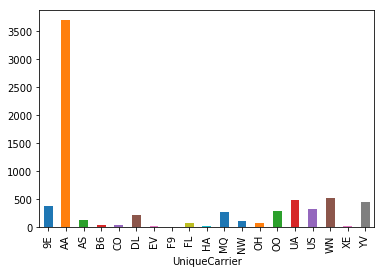

In [50]:
flights_df[(flights_df['Month'] == 4) & (flights_df['CancellationCode'] == 'A')].groupby('UniqueCarrier').size().plot(kind='bar')

**20. Examine median arrival and departure delays (in time) by carrier. Which carrier has the lowest median delay time for both arrivals and departures? Leave only non-negative values of delay times ('ArrDelay', 'DepDelay').
([Boxplots](https://seaborn.pydata.org/generated/seaborn.boxplot.html) can be helpful in this exercise, as well as it might be a good idea to remove outliers in order to build nice graphs. You can exclude delay time values higher than a corresponding .95 percentile).**

- EV
- OO
- AA
- AQ

In [54]:
data = flights_df[(flights_df['DepDelay'] >= 0) & (flights_df['ArrDelay'] >= 0)].\
                    groupby('UniqueCarrier')[['DepDelay', 'ArrDelay']].median()

In [55]:
data['DepDelay'].idxmin()

'AQ'

In [56]:
data['ArrDelay'].idxmin()

'AQ'